In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


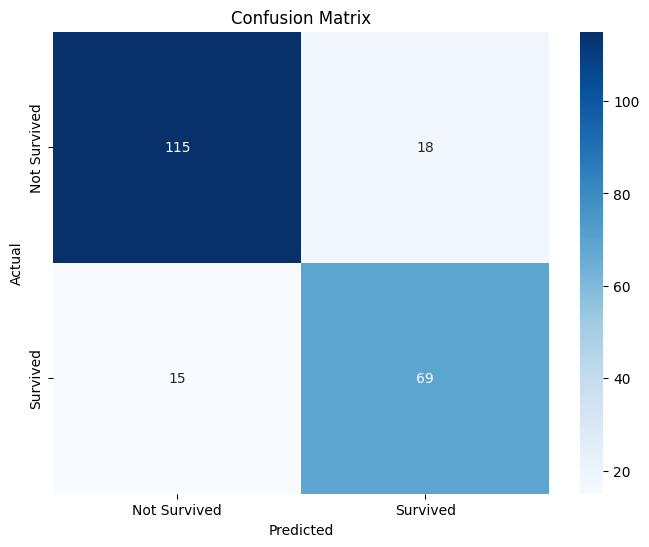

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       133
           1       0.79      0.82      0.81        84

    accuracy                           0.85       217
   macro avg       0.84      0.84      0.84       217
weighted avg       0.85      0.85      0.85       217



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_excel('/content/drive/MyDrive/MIA/2doSemestre/Analitica/KNN/titanicdf (2).xlsx')

# Eliminar columnas no necesarias
df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Imputar valores faltantes
num_features = ['Age', 'Fare']
cat_features = ['Embarked']

num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

df[num_features] = num_imputer.fit_transform(df[num_features])
df[cat_features] = cat_imputer.fit_transform(df[cat_features])

# Convertir variables categóricas en variables dummy/indicadoras
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Separar en características y variable objetivo
X = df.drop('Survived', axis=1)
y = df['Survived']

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Configurar y entrenar el modelo KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Realizar predicciones
y_pred = knn.predict(X_test)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Reporte de clasificación
print(classification_report(y_test, y_pred))

In [ ]:
import pandas as pd
y_pred_df = pd.DataFrame(y_pred, columns=['Survived'])
y_pred_df['PassengerId'] = df.PassengerId
y_pred_df = y_pred_df[['PassengerId', 'Survived']]

y_pred_df.to_csv('/content/drive/MyDrive/MIA/2doSemestre/Analitica/KNN/y_pred_knn.csv', index=False)


<ipython-input-27-d5b6f4169f4f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Actual', 'Predicted'], y=[y_test.value_counts()[0], y_pred_df['Survived'].value_counts()[0]], palette='Blues_d')
<ipython-input-27-d5b6f4169f4f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Actual', 'Predicted'], y=[y_test.value_counts()[1], y_pred_df['Survived'].value_counts()[1]], palette='Blues_d')


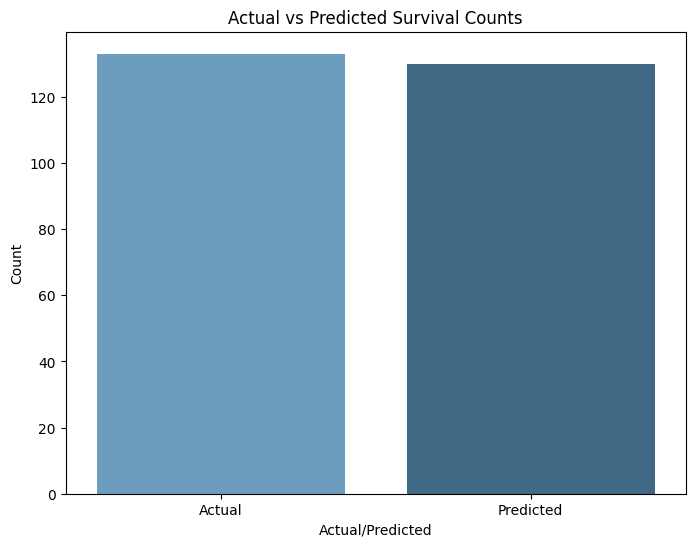

In [ ]:
# prompt: me puedes dar un grafico con como se comportaron las predicciones vs los reales valores

import matplotlib.pyplot as plt
# Create a bar chart comparing actual and predicted values
plt.figure(figsize=(8, 6))
sns.barplot(x=['Actual', 'Predicted'], y=[y_test.value_counts()[0], y_pred_df['Survived'].value_counts()[0]], palette='Blues_d')
sns.barplot(x=['Actual', 'Predicted'], y=[y_test.value_counts()[1], y_pred_df['Survived'].value_counts()[1]], palette='Blues_d')
plt.xlabel('Actual/Predicted')
plt.ylabel('Count')
plt.title('Actual vs Predicted Survival Counts')
plt.show()
